# Exercise: Naive Bayes Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
X = np.array(X)
y = np.array(y)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) #split 90% train 10% test

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

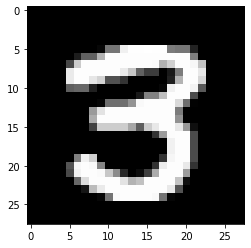

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.reshape(X_train[334,:],(28,28)), cmap='gray') #select image 334 -> need to reshape 1D vector to 2D

### E1.3: Train models on the train data.
Train a Bayes model with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data

In [6]:
#define models
from sklearn.naive_bayes import GaussianNB

bayes=GaussianNB()

In [7]:
%%time
bayes.fit(X_train,y_train)

CPU times: user 746 ms, sys: 269 ms, total: 1.02 s
Wall time: 1.01 s


GaussianNB()

In [8]:
#train error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [9]:
%%time
#Bayes
accuracy_score(y_train,bayes.predict(X_train))

CPU times: user 2.49 s, sys: 1.18 s, total: 3.67 s
Wall time: 3.68 s


0.555984126984127

In [10]:
confusion_matrix(y_train,bayes.predict(X_train))

array([[5383,   11,   39,   14,   11,   13,  190,    6,  389,  128],
       [   3, 6729,   18,   24,    2,   10,   79,    3,  171,   71],
       [ 470,  182, 1999,  358,   28,   15, 1571,   17, 1564,   96],
       [ 288,  327,   60, 2152,    9,   15,  323,   46, 2559,  648],
       [ 141,   43,   51,   29,  922,   32,  516,   25, 1401, 2967],
       [ 520,  151,   33,  119,   28,  251,  304,    9, 3670,  581],
       [  52,  108,   32,    2,    4,   23, 5849,    0,  155,    7],
       [  23,   53,   12,   49,   48,    7,   18, 1874,  265, 4227],
       [  85,  785,   32,   44,   16,   31,   79,    9, 3968, 1093],
       [  34,   41,   15,   10,   33,    5,    5,   77,  116, 5900]])

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [11]:
from sklearn.metrics import f1_score
bayes_train_acc=accuracy_score(y_train,bayes.predict(X_train))
bayes_test_acc=accuracy_score(y_test,bayes.predict(X_test))
bayes_test_f1=f1_score(y_test,bayes.predict(X_test),average='micro') #f1 ins a binary measure, we need to average it over all classesd

In [12]:
#ROC
from sklearn.metrics import roc_auc_score,  roc_curve, auc

#get the 5
y_five = y_test=='5' #get bool lables=='5' - NOTE original lables are strings! Generates Mask
bayes_five = bayes.predict_proba(X_test)[:,5] #get probability prediction for '5' 


In [13]:
bayes_fpr, bayes_tpr, _ = roc_curve(y_five.astype(int), bayes_five)
bayes_roc_auc = auc(bayes_fpr, bayes_tpr)


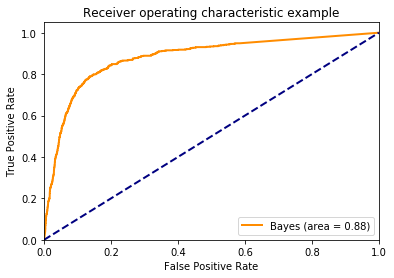

In [14]:
lw = 2
plt.plot(bayes_fpr, bayes_tpr, color='darkorange',
         lw=lw, label='Bayes (area = %0.2f)' % bayes_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
